# import

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
import taproc
from taproc import *

In [16]:
from os import path

# read file

In [3]:
file_path = Path('/home_credit_default_risk/data')

In [4]:
app_train = pd.read_csv(str(file_path/'application_train.csv'))

In [5]:
app_train_proc, y, na_dict = tabular_proc(app_train, y_fld = 'TARGET', max_n_cat=15)

# train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_trn, x_val, y_trn, y_val = train_test_split(app_train_proc, y, test_size=0.2, stratify = y)

In [8]:
col_sample = x_trn.columns[:70]

In [9]:
x_trn = x_trn[col_sample]
x_val = x_val[col_sample]

In [10]:
dataset = LGBDataset(x_trn, y_trn, x_val, y_val)

# baseline model

In [11]:
params = {
    #https://github.com/Microsoft/LightGBM/blob/master/docs/Parameters.rst
    'task': 'train',
    'objective': 'binary',
    'n_estimators':10,
    'learning_rate':0.1,
    'num_leaves':30,
    'colsample_bytree':.8,
    'subsample':.9,
    'max_depth':7,
    'reg_alpha':.1,
    'reg_lambda':.1,
    'min_split_gain':.01,
    'min_child_weight':2,
    'verbose':3,
    'metric': 'binary_logloss'}

In [17]:
learner = LGBLearner(dataset)

In [18]:
learner.fit(params) #, early_stopping_rounds=5

[1]	valid_0's binary_logloss: 0.624912
[2]	valid_0's binary_logloss: 0.569154
[3]	valid_0's binary_logloss: 0.522947
[4]	valid_0's binary_logloss: 0.484272
[5]	valid_0's binary_logloss: 0.451809
[6]	valid_0's binary_logloss: 0.424098
[7]	valid_0's binary_logloss: 0.400465
[8]	valid_0's binary_logloss: 0.380221
[9]	valid_0's binary_logloss: 0.36286
[10]	valid_0's binary_logloss: 0.348139


# dendrogram

In [20]:
ddg = dendogram.from_df(x_trn)

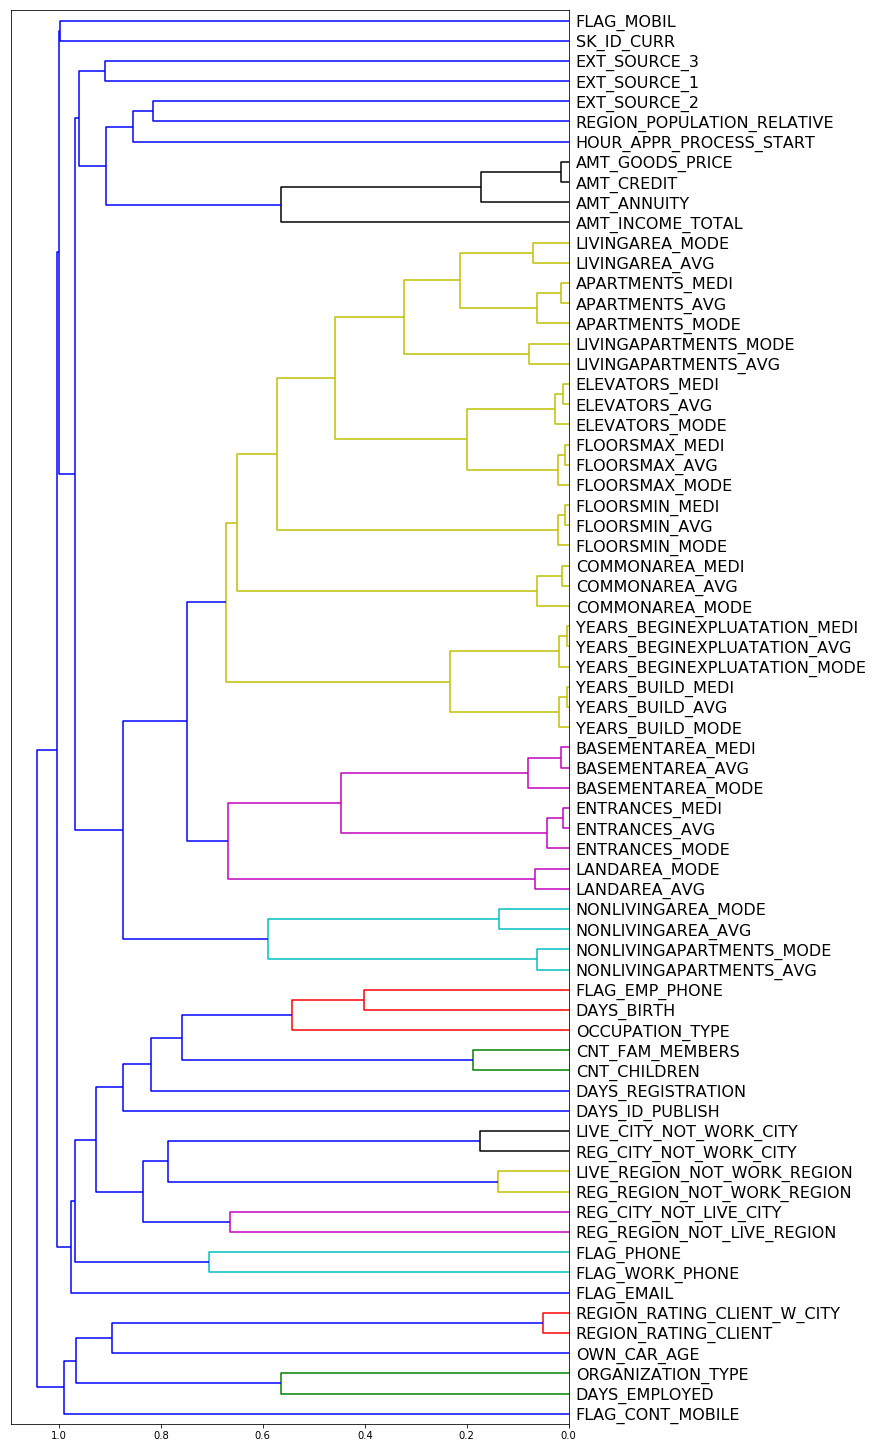

In [21]:
ddg.plot()

In [22]:
col_group = [['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
            ['LIVINGAREA_MODE', 'LIVINGAREA_AVG'],
            ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
            ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG'],
            ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
            ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
            ['FLOORSMIN_AVG', 'FLOORSMIN_MODE'],
            ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
            ['YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE'],
            ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
            ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
            ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
            ['LANDAREA_AVG', 'LANDAREA_MODE'],
            ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE'],
            ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG'],
            ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],
            ['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY'],
            ['LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION'],
            ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']]

In [23]:
col_group = col_group + [i for i in x_trn.columns if i not in flat_list(col_group)]

In [24]:
col_group

[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'AMT_ANNUITY'],
 ['LIVINGAREA_MODE', 'LIVINGAREA_AVG'],
 ['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE'],
 ['LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG'],
 ['ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE'],
 ['FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE'],
 ['FLOORSMIN_AVG', 'FLOORSMIN_MODE'],
 ['COMMONAREA_AVG', 'COMMONAREA_MEDI', 'COMMONAREA_MODE'],
 ['YEARS_BEGINEXPLUATATION_AVG',
  'YEARS_BEGINEXPLUATATION_MEDI',
  'YEARS_BEGINEXPLUATATION_MODE'],
 ['YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE'],
 ['BASEMENTAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE'],
 ['ENTRANCES_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE'],
 ['LANDAREA_AVG', 'LANDAREA_MODE'],
 ['NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE'],
 ['NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG'],
 ['CNT_CHILDREN', 'CNT_FAM_MEMBERS'],
 ['LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY'],
 ['LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION'],
 ['REG

# feature importance

In [25]:
impt = importance.from_LGB_learner(learner, col_group)

In [26]:
impt.I[:5]

,Feature,Importance
40,EXT_SOURCE_3,0.079002
39,EXT_SOURCE_2,0.065391
38,EXT_SOURCE_1,0.021383
0,AMT_GOODS_PRICE & AMT_CREDIT & AMT_ANNUITY,0.008218
22,DAYS_BIRTH,0.004743


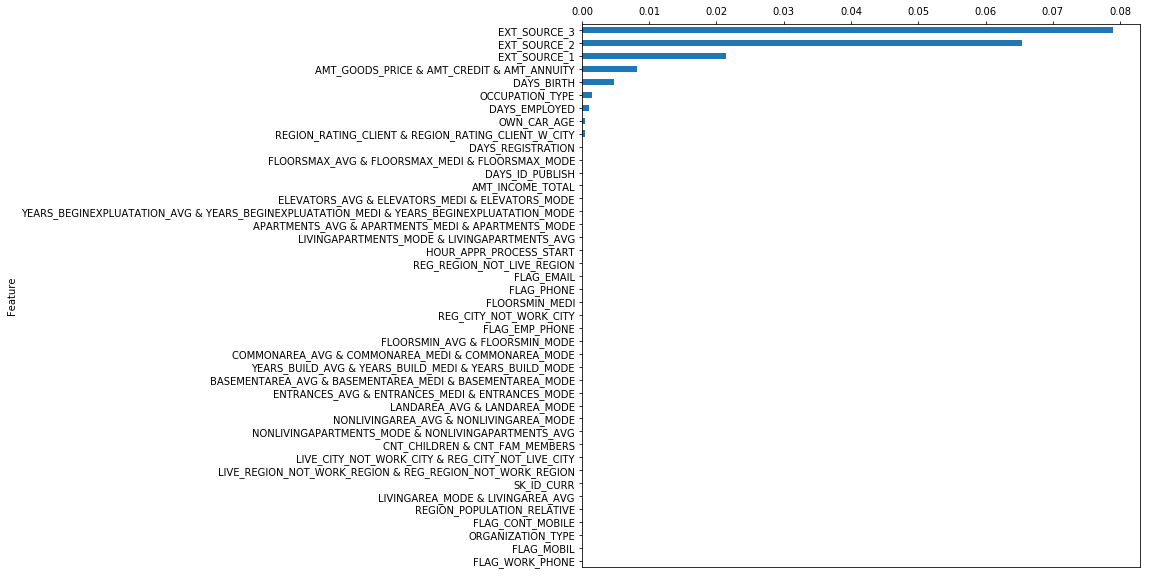

In [27]:
impt.plot()

Default feature importance

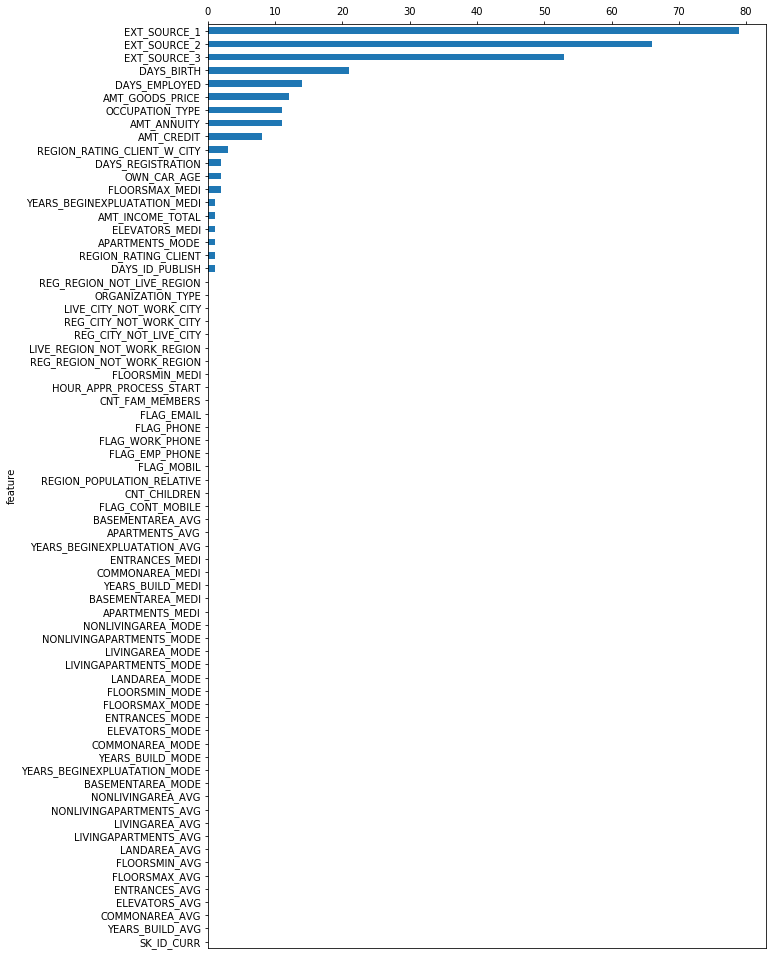

In [38]:
plot_barh(pd.DataFrame.from_dict({'feature': x_trn.columns, 
                                  'imporance': learner.md.feature_importance()}),
         width = 10)